In [3]:
import os
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# 클래스 - encoding 변환 함수
def get_convert(class_dir='../open/classes.txt'):
    f = open(class_dir, 'r')
    lines = [list(line.strip().split(',')) for line in f.readlines()]
    f.close()

    encode = {}
    decode = {}
    for cls_num, cls_name in lines:
        encode[int(cls_num)] = cls_name
        decode[cls_name] = int(cls_num)
    
    return encode, decode

encode, decode = get_convert()

print('encode')
for k,v in encode.items():
    print(k, '->', v)
print()
print('decode')
for k,v in decode.items():
    print(k, '->', v)

encode
0 -> chevrolet_malibu_sedan_2012_2016
1 -> chevrolet_malibu_sedan_2017_2019
2 -> chevrolet_spark_hatchback_2016_2021
3 -> chevrolet_trailblazer_suv_2021_
4 -> chevrolet_trax_suv_2017_2019
5 -> genesis_g80_sedan_2016_2020
6 -> genesis_g80_sedan_2021_
7 -> genesis_gv80_suv_2020_
8 -> hyundai_avante_sedan_2011_2015
9 -> hyundai_avante_sedan_2020_
10 -> hyundai_grandeur_sedan_2011_2016
11 -> hyundai_grandstarex_van_2018_2020
12 -> hyundai_ioniq_hatchback_2016_2019
13 -> hyundai_sonata_sedan_2004_2009
14 -> hyundai_sonata_sedan_2010_2014
15 -> hyundai_sonata_sedan_2019_2020
16 -> kia_carnival_van_2015_2020
17 -> kia_carnival_van_2021_
18 -> kia_k5_sedan_2010_2015
19 -> kia_k5_sedan_2020_
20 -> kia_k7_sedan_2016_2020
21 -> kia_mohave_suv_2020_
22 -> kia_morning_hatchback_2004_2010
23 -> kia_morning_hatchback_2011_2016
24 -> kia_ray_hatchback_2012_2017
25 -> kia_sorrento_suv_2015_2019
26 -> kia_sorrento_suv_2020_
27 -> kia_soul_suv_2014_2018
28 -> kia_sportage_suv_2016_2020
29 -> kia_s

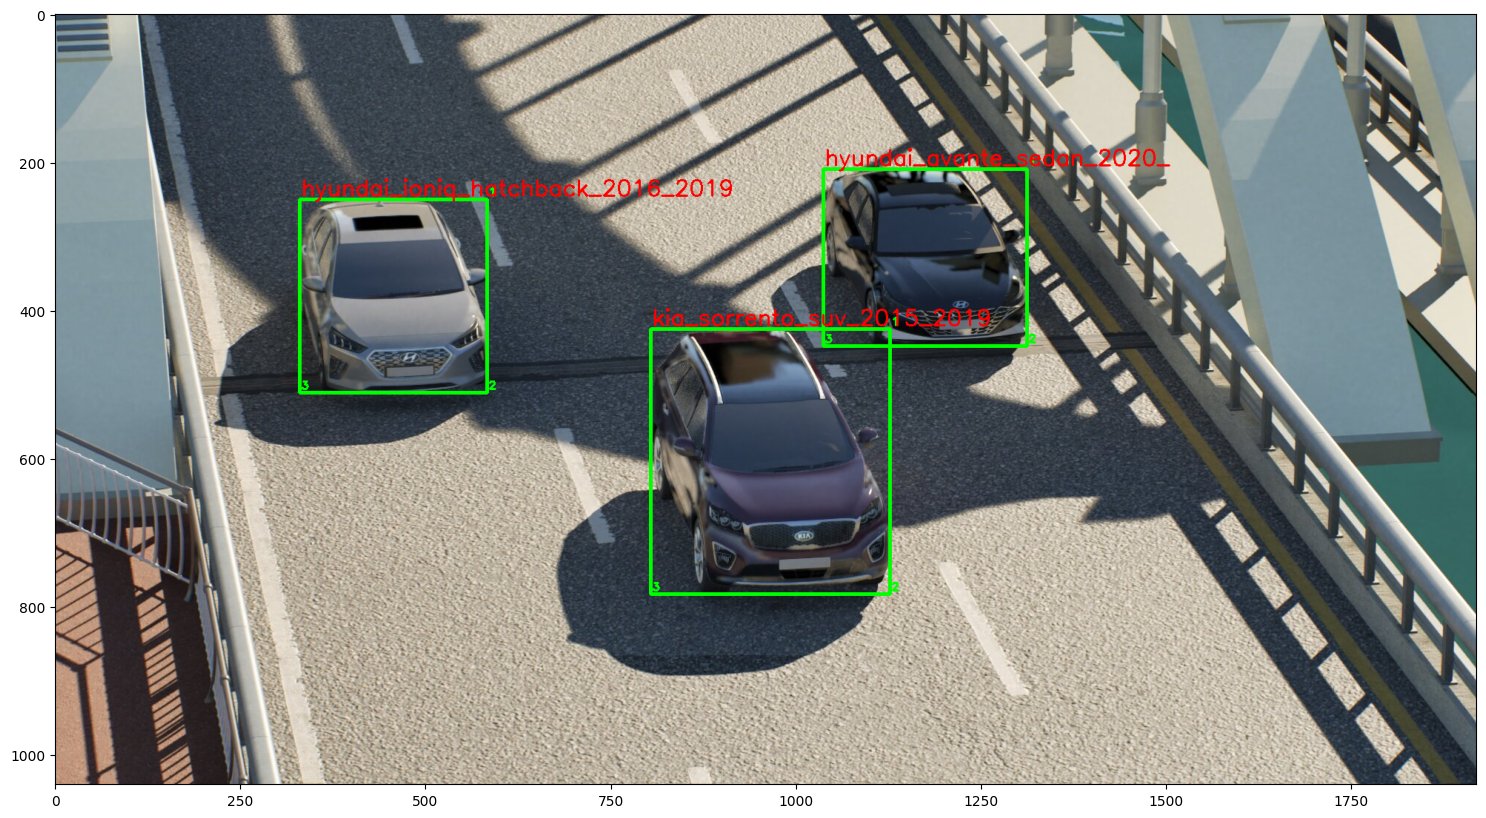

In [10]:
# 이미지와 bbox 확인
def viz(image_name='syn_00000.png', base_dir='../open/train', axis='on'):
    name, ext = image_name.split('.')
    image_path = os.path.join(base_dir, image_name)
    anno_path = os.path.join(base_dir, name+'.txt')
    assert glob.glob(image_path), 'image not found'
    assert glob.glob(anno_path), 'annotation not found'

    anno_file = open(anno_path, 'r')
    anno_lines = [list(map(float, line.strip().split())) for line in anno_file.readlines()]
    anno_file.close()

    image = cv2.imread(image_path)
    bbox_color = (0, 255, 0)
    text_color = (0, 0, 255)
    for line in anno_lines:
        cls, x1, y1, x2, y2, x3, y3, x4, y4 = map(int, line)
        pts = np.array([[x1, y1], [x2, y2], [x3, y3], [x4, y4]], np.int32)

        # bbox 표시
        image = cv2.polylines(image, [pts], True, bbox_color, 3)

        # 좌표 순서 표시
        cv2.putText(image,"1",(pts[1][0]+2,pts[1][1]-5), cv2.FONT_HERSHEY_SIMPLEX, .5, bbox_color, 2)
        cv2.putText(image,"2",(pts[2][0]+2,pts[2][1]-5), cv2.FONT_HERSHEY_SIMPLEX, .5, bbox_color, 2)
        cv2.putText(image,"3",(pts[3][0]+2,pts[3][1]-5), cv2.FONT_HERSHEY_SIMPLEX, .5, bbox_color, 2)
        
        # 클래스명 표시
        cv2.putText(image,encode[cls],(pts[0][0]+2,pts[0][1]-5), cv2.FONT_HERSHEY_SIMPLEX, 1, text_color, 2)
        

    fig, axes = plt.subplots(1, figsize=(20, 10))

    axes.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes.axis(axis)

viz()